In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Flight_Booking.csv')
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

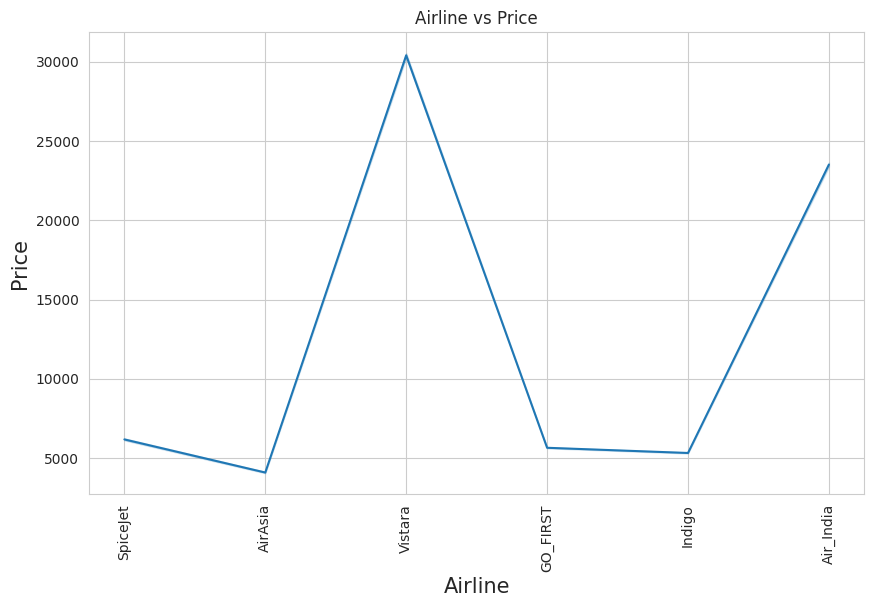

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'airline' , y = 'price' , data = df  )
plt.title('Airline vs Price')
plt.xlabel('Airline' , fontsize = 15)
plt.ylabel('Price' , fontsize= 15)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'airline' , y = 'price' , data = df , palette='Set2' )
plt.title('Airline vs Price')
plt.xlabel('Airline' , fontsize = 15)
plt.ylabel('Price' , fontsize= 15)
plt.xticks(rotation = 90)
plt.show()
#Price range of all the flights

/tmp/ipython-input-735900776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'airline' , y = 'price' , data = df , palette='Set2' )


In [ ]:
#Range of price of all the flights of Economy and Business class
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'class' , y = 'price' , data = df , palette='Set2' , hue = 'airline' )
plt.show()

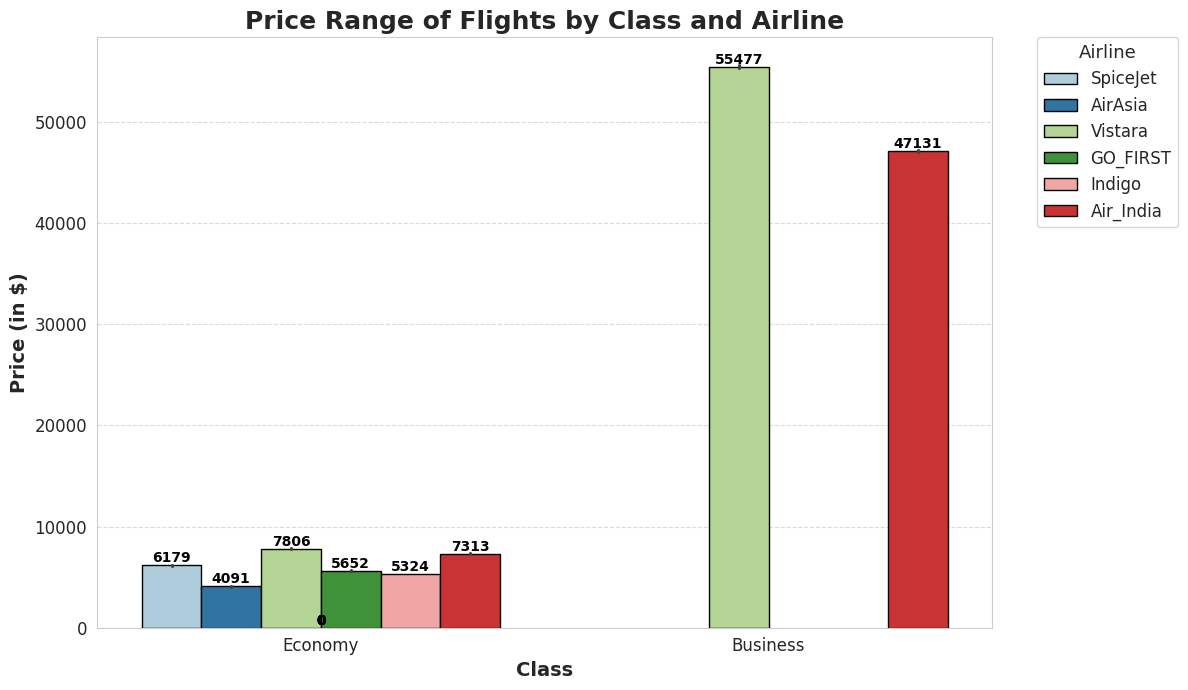

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style
sns.set_style("whitegrid")  # 'whitegrid', 'darkgrid', 'ticks', 'white'

# Set figure size
plt.figure(figsize=(12,7))

# Create barplot
sns.barplot(
    x='class',
    y='price',
    data=df,
    hue='airline',  # separate bars by airline
    palette=sns.color_palette("Paired", n_colors=df['airline'].nunique()),  # vibrant palette
    edgecolor='black'  # adds a nice border around bars
)

# Add title and axis labels with fonts
plt.title('Price Range of Flights by Class and Airline', fontsize=18, fontweight='bold')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Price (in $)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for clarity
plt.xticks(rotation=0, fontsize=12)

# Rotate y-axis ticks slightly for aesthetics
plt.yticks(fontsize=12)

# Show legend outside the plot
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12, title_fontsize=13)

# Add gridlines for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: add value labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}',
                       (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=10, color='black', fontweight='bold', rotation=0)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


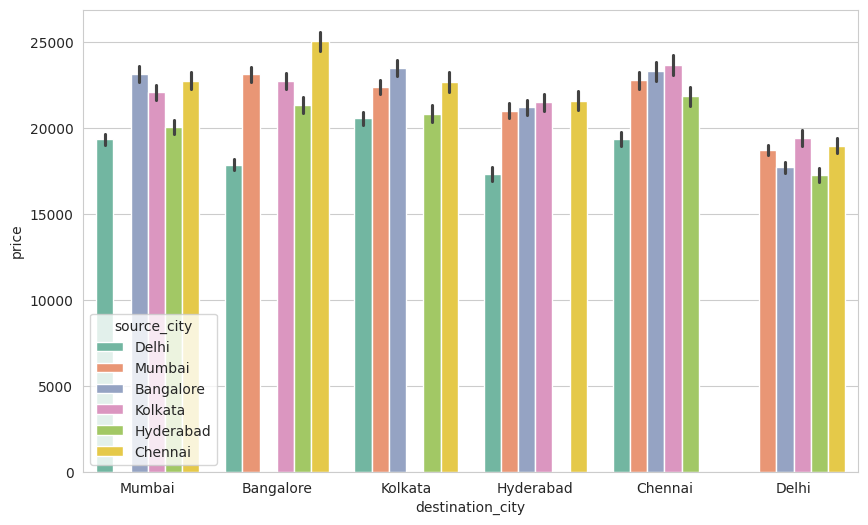

In [ ]:
#Range of price of flights with source and destination city according to the days left
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'destination_city' , y = 'price' , data = df , palette='Set2' , hue = 'source_city' )
plt.show()


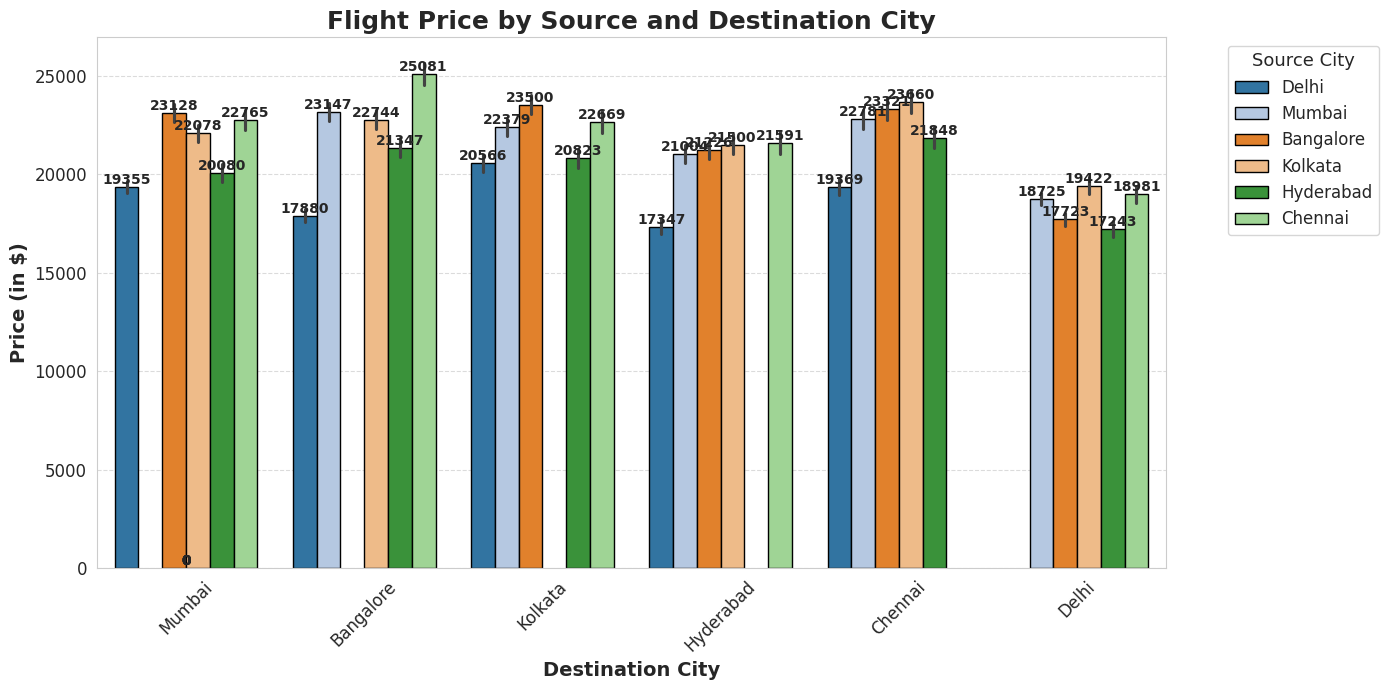

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Figure size
plt.figure(figsize=(14,7))

# Bar plot
sns.barplot(
    x='destination_city',
    y='price',
    hue='source_city',
    data=df,
    palette=sns.color_palette("tab20", n_colors=df['source_city'].nunique()),  # vibrant, distinct colors
    edgecolor='black'
)

# Title and labels
plt.title('Flight Price by Source and Destination City', fontsize=18, fontweight='bold')
plt.xlabel('Destination City', fontsize=14, fontweight='bold')
plt.ylabel('Price (in $)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Place legend outside plot
plt.legend(title='Source City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with prices
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}',
                       (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
df[['price' , 'days_left' , 'destination_city' ]]

price  days_left destination_city
0        5953          1           Mumbai
1        5953          1           Mumbai
2        5956          1           Mumbai
3        5955          1           Mumbai
4        5955          1           Mumbai
...       ...        ...              ...
300148  69265         49        Hyderabad
300149  77105         49        Hyderabad
300150  79099         49        Hyderabad
300151  81585         49        Hyderabad
300152  81585         49        Hyderabad

[300153 rows x 3 columns]

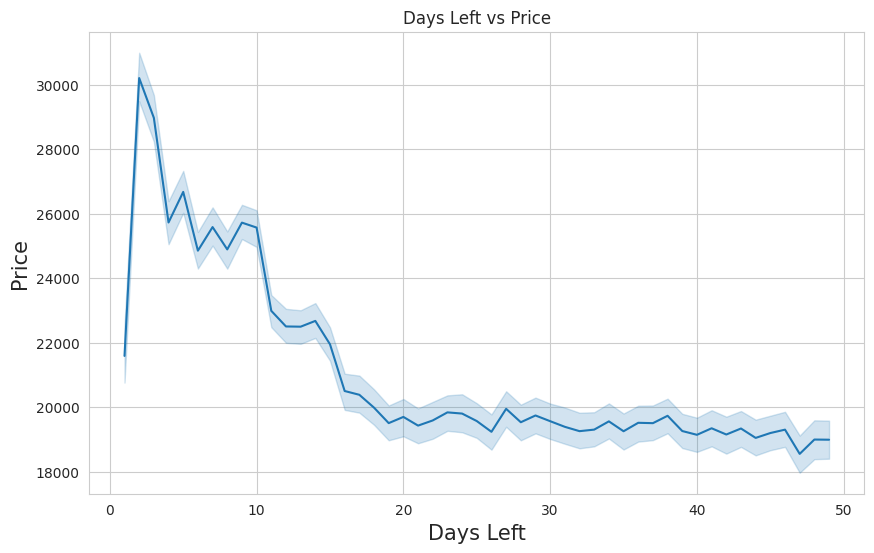

In [ ]:
#The price of the ticket increases as the days left for departure decreases
plt.figure(figsize = (10,6))
sns.lineplot(x = 'days_left' , y = 'price' , data = df)
plt.title('Days Left vs Price')
plt.xlabel('Days Left' , fontsize = 15)
plt.ylabel('Price' , fontsize= 15)
plt.show()

In [ ]:
#Range of price of flights with source and destination city according to the days left
fig, ax = plt.subplots(1, 2, figsize=(20, 6)) # Create figure and axes

sns.lineplot(x='days_left', y='price', data=df, palette='Set2', hue='source_city', ax=ax[0])
ax[0].set_title('Days Left vs Price by Source City') # Add title to the first subplot
ax[0].set_xlabel('Days Left')
ax[0].set_ylabel('Price')

sns.lineplot(x='days_left', y='price', data=df, palette='Set2', hue='destination_city', ax=ax[1])
ax[1].set_title('Days Left vs Price by Destination City') # Add title to the second subplot
ax[1].set_xlabel('Days Left')
ax[1].set_ylabel('Price')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
3###plt.show()

3

/tmp/ipython-input-1252036752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'airline' , data = df , palette='Set2')
/tmp/ipython-input-1252036752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'source_city' , data = df , palette='Set2')
/tmp/ipython-input-1252036752.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'destination_city' , data = df , palette='Set2')
/tmp/ipython-input-1252036752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

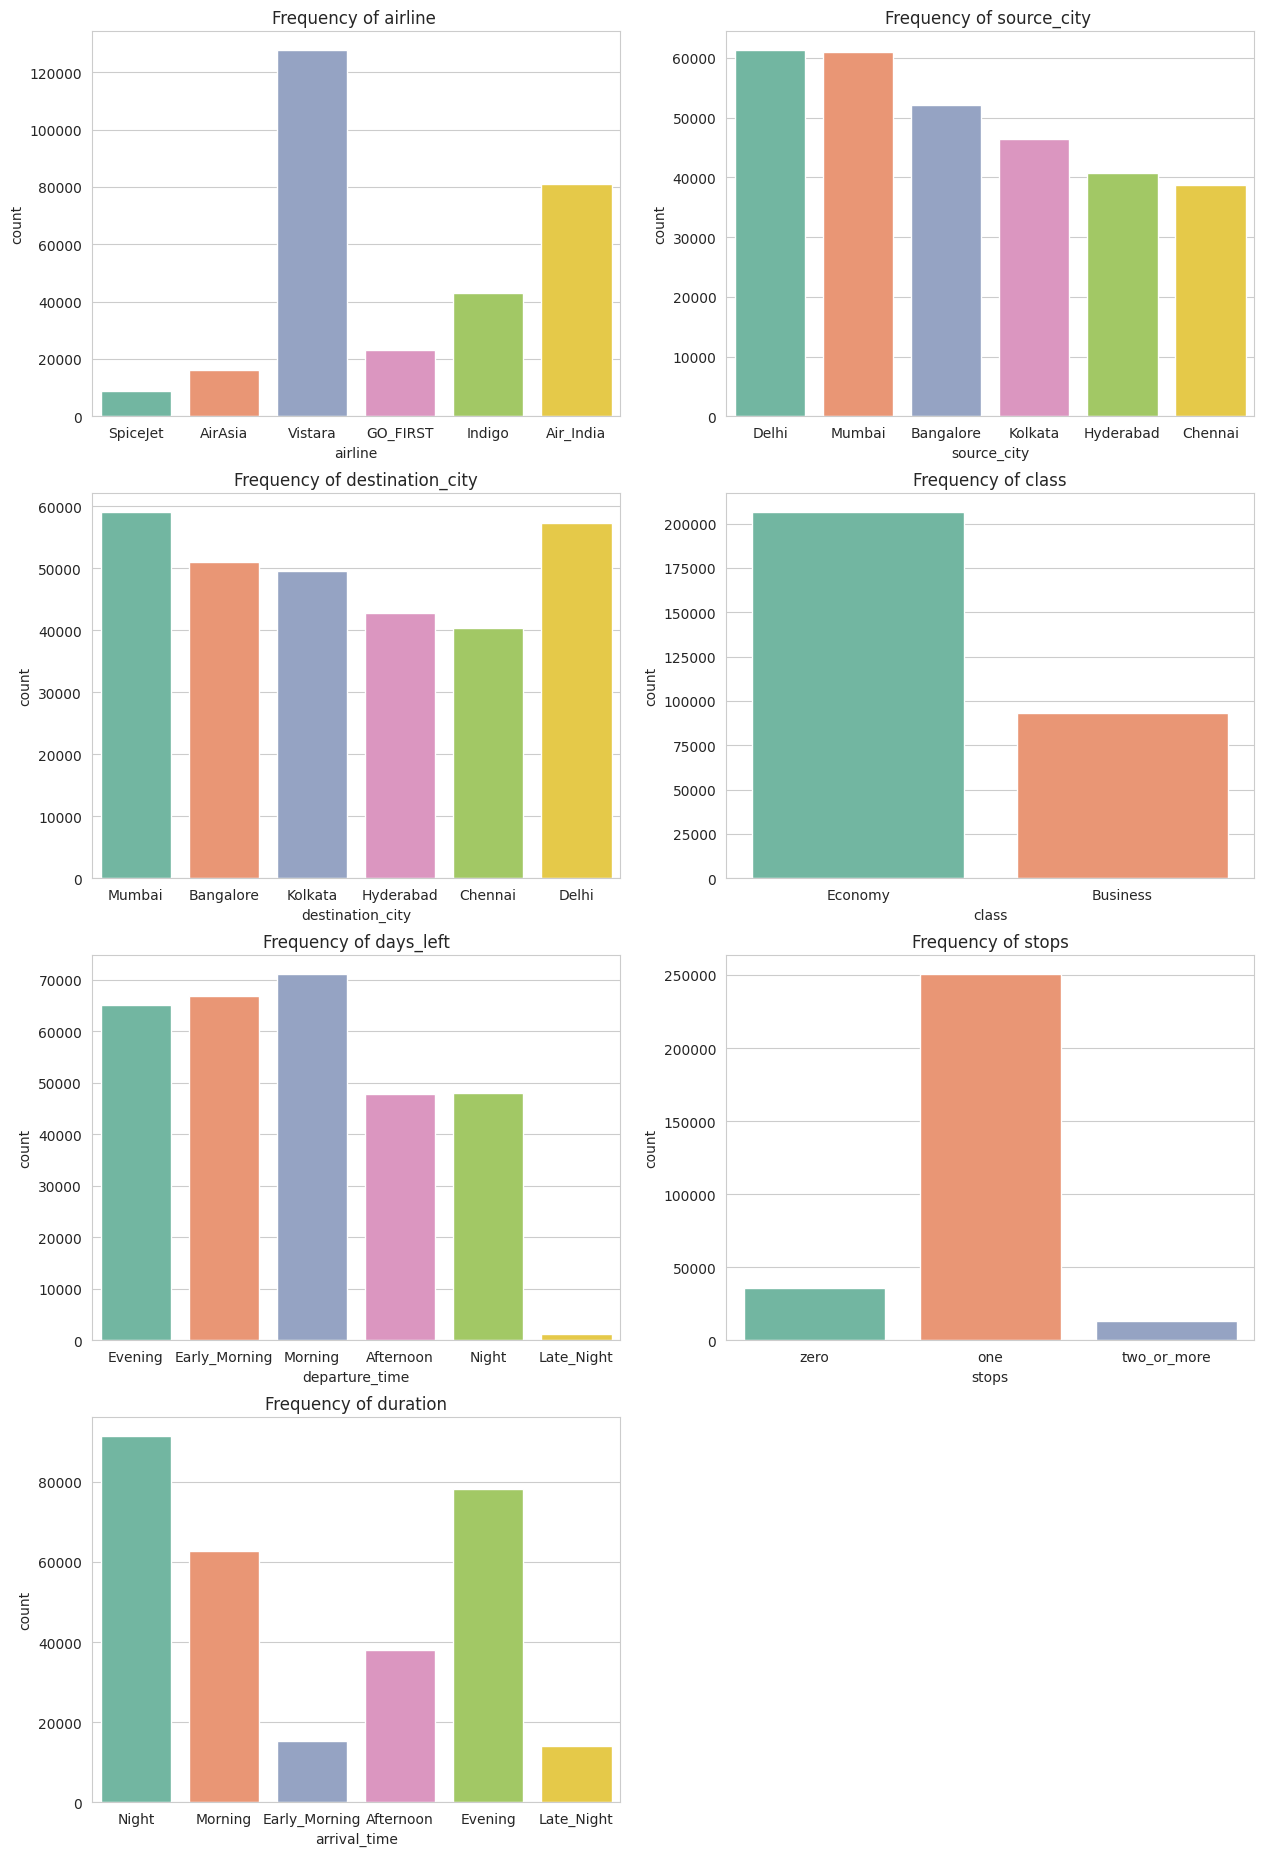

In [ ]:
#Visualization of categorical features with countplot
#plt.subplot(nrows, ncols, index)
plt.figure(figsize = (15,23))
plt.subplot(4,2,1)
sns.countplot(x = 'airline' , data = df , palette='Set2')
plt.title('Frequency of airline ')

plt.subplot(4,2,2)
sns.countplot(x = 'source_city' , data = df , palette='Set2')
plt.title('Frequency of source_city ')

plt.subplot(4,2,3)
sns.countplot(x = 'destination_city' , data = df , palette='Set2')
plt.title('Frequency of destination_city')

plt.subplot(4,2,4)
sns.countplot(x = 'class' , data = df , palette='Set2')
plt.title('Frequency of class')

plt.subplot(4,2,5)
sns.countplot(x = 'departure_time' , data = df , palette='Set2')
plt.title('Frequency of days_left')

plt.subplot(4,2,6)
sns.countplot(x = 'stops' , data = df , palette='Set2')
plt.title('Frequency of stops')

plt.subplot(4,2,7)
sns.countplot(x = 'arrival_time' , data = df , palette='Set2')
plt.title('Frequency of duration')


plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


/tmp/ipython-input-1227933157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'airline' , data = df , palette='Set2')
/tmp/ipython-input-1227933157.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'source_city' , data = df , palette='Set2')
/tmp/ipython-input-1227933157.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'destination_city' , data = df , palette='Set2')
/tmp/ipython-input-1227933157.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

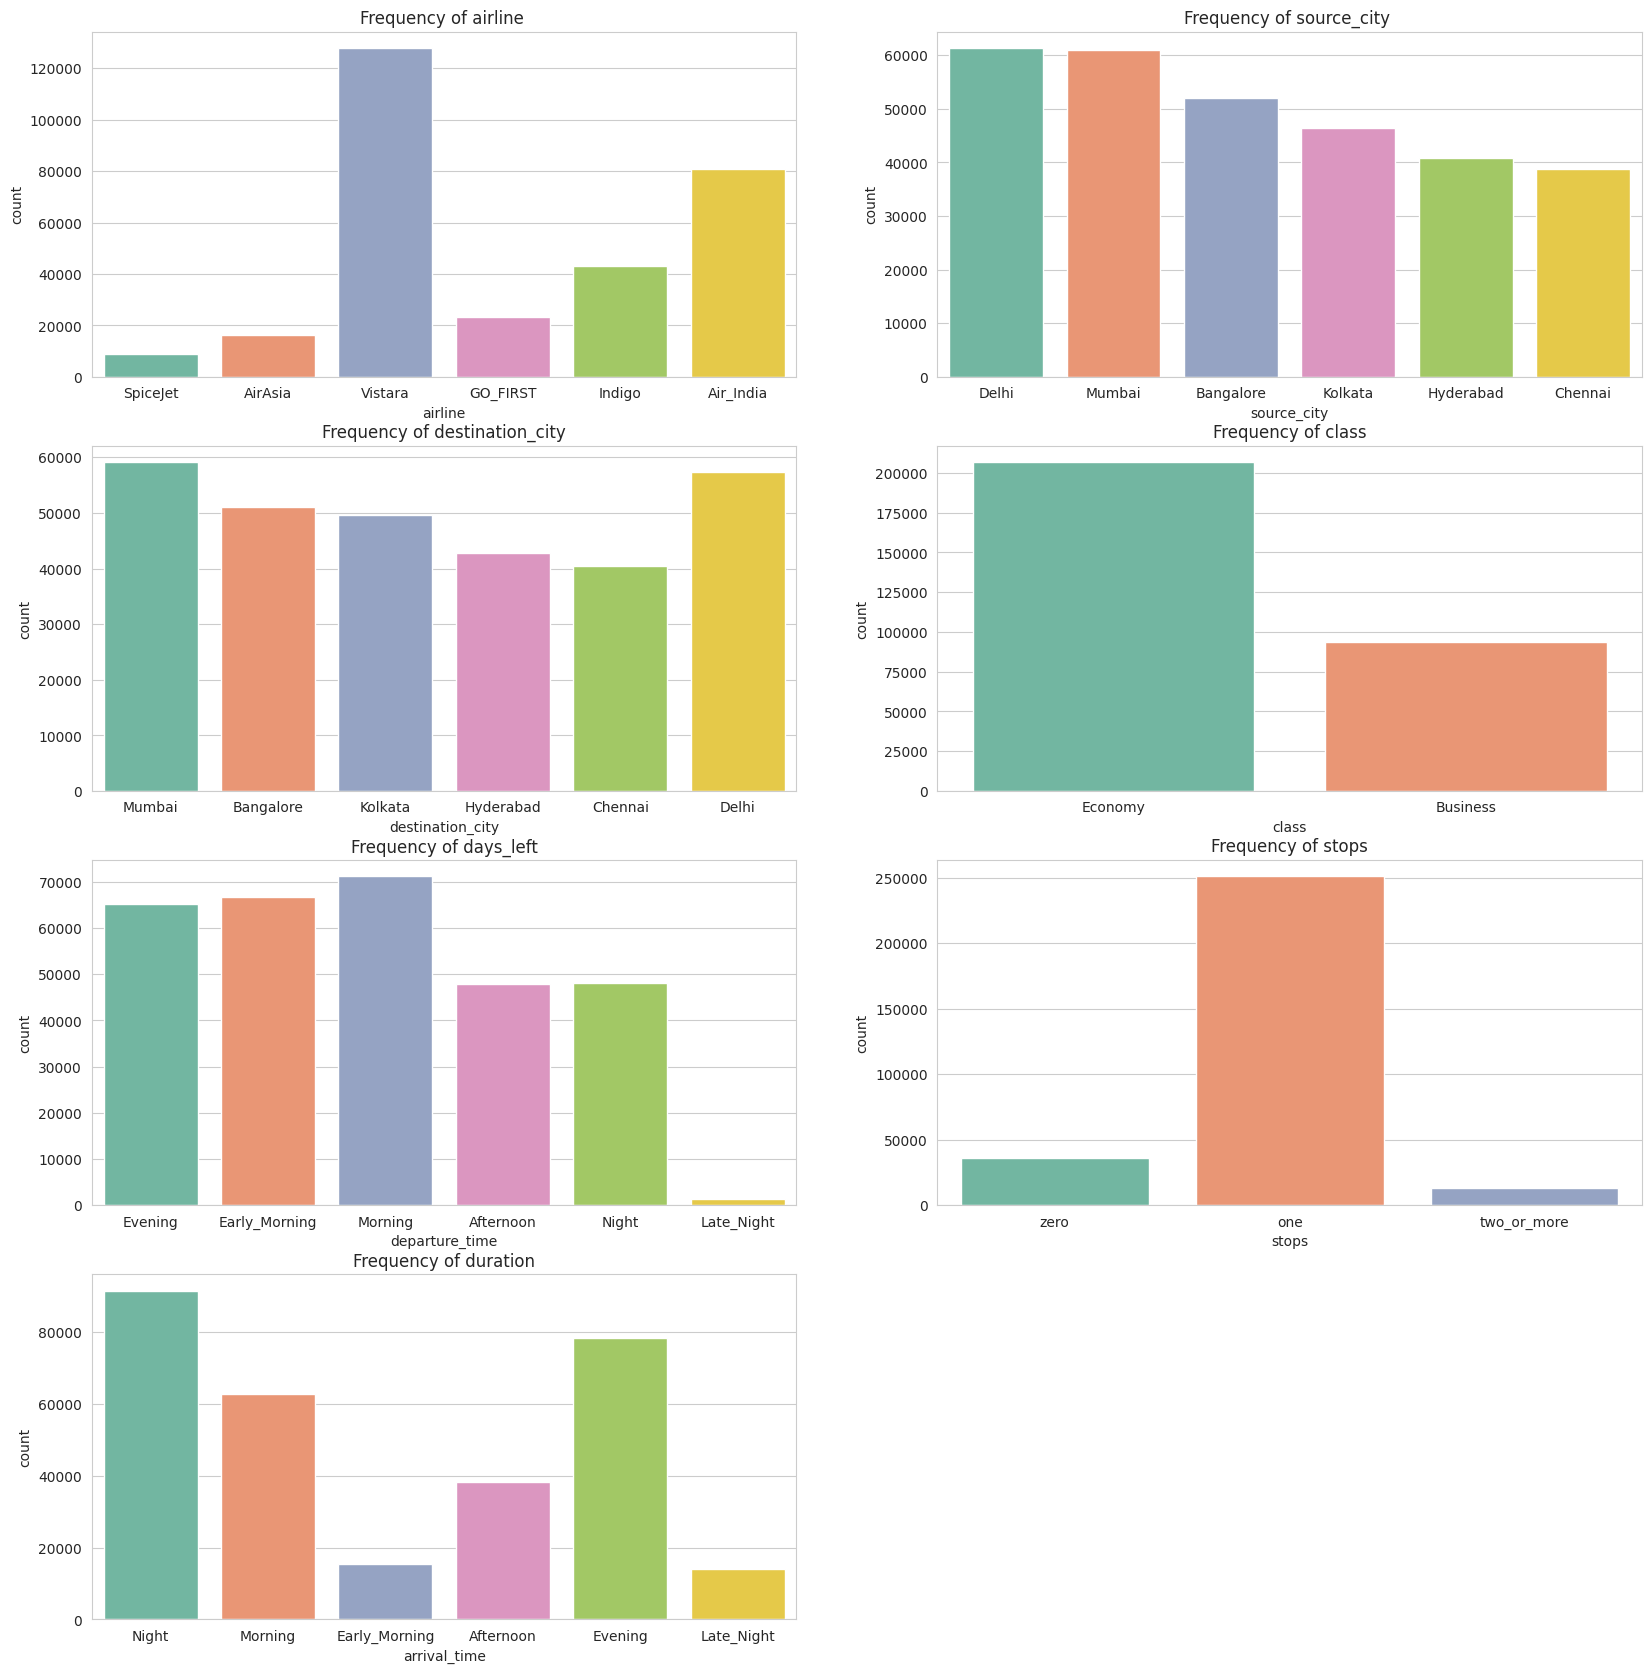

In [ ]:
#Visualization of categorical features with countplot
#plt.subplot(nrows, ncols, index)
plt.figure(figsize = (20,26))
plt.subplot(5,2,1)
sns.countplot(x = 'airline' , data = df , palette='Set2')
plt.title('Frequency of airline ')

plt.subplot(5,2,2)
sns.countplot(x = 'source_city' , data = df , palette='Set2')
plt.title('Frequency of source_city ')

plt.subplot(5,2,3)
sns.countplot(x = 'destination_city' , data = df , palette='Set2')
plt.title('Frequency of destination_city')

plt.subplot(5,2,4)
sns.countplot(x = 'class' , data = df , palette='Set2')
plt.title('Frequency of class')

plt.subplot(5,2,5)
sns.countplot(x = 'departure_time' , data = df , palette='Set2')
plt.title('Frequency of days_left')

plt.subplot(5,2,6)
sns.countplot(x = 'stops' , data = df , palette='Set2')
plt.title('Frequency of stops')

plt.subplot(5,2,7)
sns.countplot(x = 'arrival_time' , data = df , palette='Set2')
plt.title('Frequency of duration')


plt.show()

In [ ]:
#Performing One Hot Encoding for categorical features of a dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


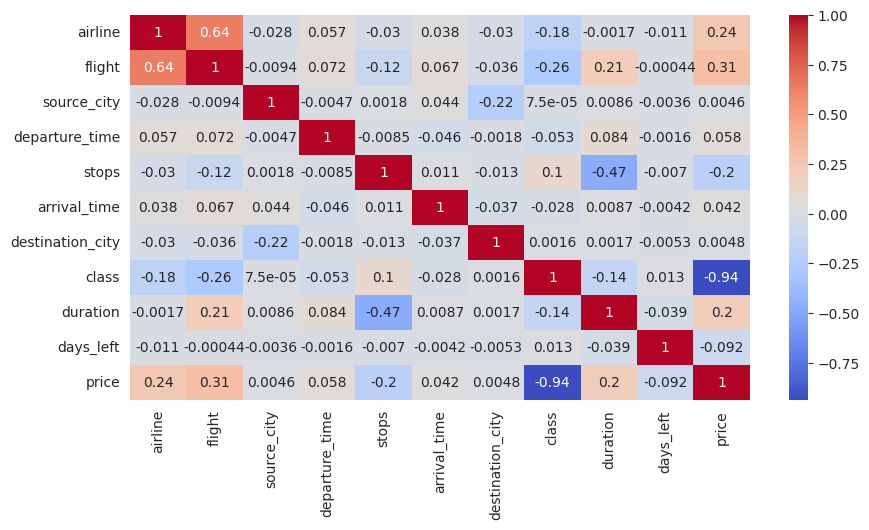

In [ ]:
#Plotting the correlation graph to see the correlation between features and dependent variable.
plt.figure(figsize = (10,5))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')
plt.show()


In [ ]:
'''Selecting the features using
VIF. VIF should be less than 5.
So drop the stops feature.'''
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [ ]:
df = df.drop(columns=['flight'])
col_list = []
for col in df.columns:
  if((df[col].dtype != 'object') & (col != 'price')):
    col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [ ]:
X = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff

Actual     Predicted
27131     7366   4585.880510
266857   64831  52842.077073
141228    6195   7877.980184
288329   60160  56120.138579
97334     6578   6663.204177
...        ...           ...
5234      5026   5829.230618
5591      3001    539.222230
168314    6734   5848.965500
175191    5082  -1498.061918
287693   66465  58762.406345

[60031 rows x 2 columns]

In [ ]:
'''Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7259.93 and Mean absolute percentage
error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.'''
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

r2_score(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mean_abs_error)
mean_absolute_percentage_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
np.sqrt(mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4624.994868016881


np.float64(7014.309680483319)

/tmp/ipython-input-2610042406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test , label = 'Actual')
/tmp/ipython-input-2610042406.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , label = 'Predicted')


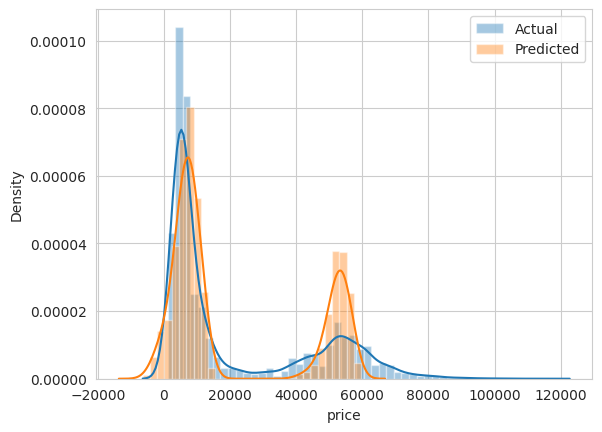

In [ ]:
sns.distplot(y_test , label = 'Actual')
sns.distplot(y_pred , label = 'Predicted')
plt.legend()

/tmp/ipython-input-2788066558.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test , label = 'Actual')
/tmp/ipython-input-2788066558.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , label = 'Predicted')


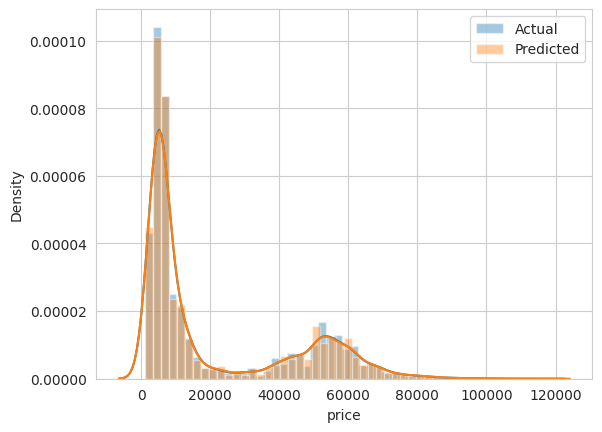

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff

sns.distplot(y_test , label = 'Actual')
sns.distplot(y_pred , label = 'Predicted')
plt.legend()

/tmp/ipython-input-2309231758.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test , label = 'Actual')
/tmp/ipython-input-2309231758.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred , label = 'Predicted')


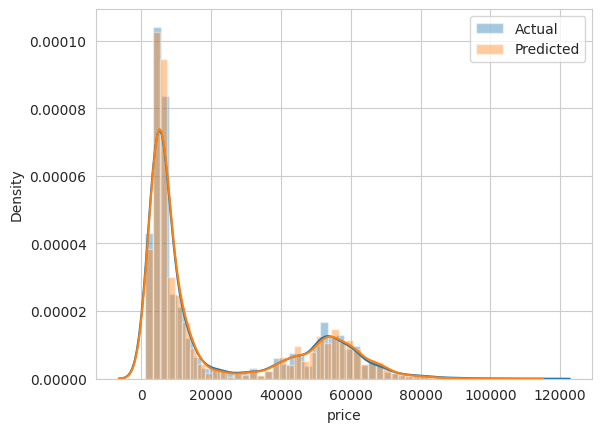

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
diff

sns.distplot(y_test , label = 'Actual')
sns.distplot(y_pred , label = 'Predicted')
plt.legend()